In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

### Read dataset

In [2]:
train_patient = pd.read_csv('./train.csv')
test_patient = pd.read_csv('./test.csv')
sample_patient = pd.read_csv('./sample_submission.csv')

In [3]:
train_patient.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


In [4]:
test_patient.head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,patient_id_4373,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,F
1,patient_id_2204,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,F
2,patient_id_93,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,M
3,patient_id_798,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,F
4,patient_id_789,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,F


In [5]:
sample_patient.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


### Exploratory Data Analysis

In [6]:
train_patient.shape, test_patient.shape, sample_patient.shape

((3088, 12), (1324, 11), (1324, 2))

In [7]:
target_label = [col for col in train_patient.columns if col not in test_patient.columns]
target_label

['SOURCE']

In [8]:
train_patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   patient_id_   3088 non-null   object 
 1   HAEMATOCRIT   3088 non-null   float64
 2   HAEMOGLOBINS  3088 non-null   float64
 3   ERYTHROCYTE   3088 non-null   float64
 4   LEUCOCYTE     3088 non-null   float64
 5   THROMBOCYTE   3088 non-null   int64  
 6   MCH           3088 non-null   float64
 7   MCHC          3088 non-null   float64
 8   MCV           3088 non-null   float64
 9   AGE           3088 non-null   int64  
 10  SEX           3088 non-null   object 
 11  SOURCE        3088 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 289.6+ KB


In [9]:
train_patient.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SOURCE
count,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000,3088.000000
mean,38.381865,12.638472,4.752160,8.788504,260.652850,28.218264,33.352364,84.540026,46.617876,0.409974
std,6.070420,2.104983,0.792281,5.055580,115.504157,2.658656,1.227691,6.814936,21.684646,0.491908
min,13.900000,4.300000,1.690000,1.200000,13.000000,14.900000,26.400000,54.000000,1.000000,0.000000
25%,34.500000,11.275000,4.240000,5.700000,191.000000,27.200000,32.700000,81.500000,29.000000,0.000000
50%,38.800000,12.800000,4.790000,7.600000,259.000000,28.700000,33.400000,85.400000,47.000000,0.000000
75%,42.700000,14.200000,5.260000,10.400000,325.000000,29.800000,34.100000,88.700000,64.000000,1.000000
max,69.200000,18.100000,8.070000,76.700000,1188.000000,36.800000,39.000000,105.300000,99.000000,1.000000


In [10]:
test_patient.describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000,1324.000000
mean,38.434592,12.649320,4.749162,8.888822,266.889728,28.273036,33.321299,84.783006,46.646526
std,5.747626,2.020961,0.764941,5.034963,110.236480,2.705596,1.231122,6.960646,21.847658
min,14.800000,3.700000,2.190000,1.200000,15.000000,16.500000,26.000000,54.100000,1.000000
25%,34.800000,11.400000,4.290000,5.900000,200.000000,27.100000,32.600000,81.600000,29.000000
50%,38.850000,12.800000,4.770000,7.700000,267.000000,28.700000,33.400000,85.400000,48.000000
75%,42.700000,14.025000,5.270000,10.600000,327.000000,29.900000,34.100000,88.800000,64.000000
max,58.300000,18.800000,7.170000,60.900000,979.000000,40.800000,37.600000,115.600000,98.000000


In [11]:
#grouping the features into categorical and numerical

categorical_feat = [patient_id_ for patient_id_ in train_patient.columns if train_patient[patient_id_].all() == '0']
categorical_feat

[]

In [12]:
num_feat = [feat for feat in train_patient.columns if feat not in categorical_feat]
num_feat

['patient_id_',
 'HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SEX',
 'SOURCE']

In [13]:
train_patient[num_feat].head()

,patient_id_,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,patient_id_1270,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F,0
1,patient_id_1762,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M,0
2,patient_id_3355,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F,0
3,patient_id_2443,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M,0
4,patient_id_3414,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F,1


In [14]:
rem = ["patient_id_", "SOURCE"]

for i in rem:
    num_feat.remove(i)
    
num_feat

['HAEMATOCRIT',
 'HAEMOGLOBINS',
 'ERYTHROCYTE',
 'LEUCOCYTE',
 'THROMBOCYTE',
 'MCH',
 'MCHC',
 'MCV',
 'AGE',
 'SEX']

In [15]:
train_patient[num_feat].head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F


<AxesSubplot:xlabel='AGE', ylabel='Density'>

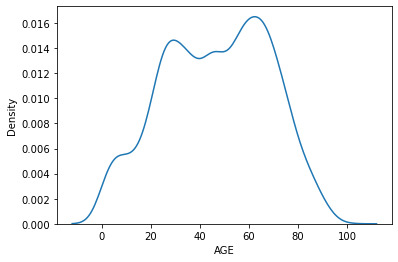

In [16]:
sns.kdeplot(train_patient.AGE)

In [17]:
train_patient[num_feat].head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,F
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,M
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,F
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,M
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,F


### Data Preprocessing 

**Scaling The Dataset**

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor

In [19]:
le = LabelEncoder()
le

LabelEncoder()

In [20]:
#x = pd.get_dummies(train_patient[num_feat]["SEX"]
df = train_patient[num_feat]
df.SEX = le.fit_transform(df.SEX)
df.head()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,43.6,14.5,5.52,3.0,237,27.5,33.6,81.7,32,0
1,44.3,14.4,5.09,7.3,255,29.7,32.9,90.4,40,1
2,36.2,12.5,4.57,7.8,263,28.9,35.0,82.6,65,0
3,46.1,14.7,5.38,8.5,320,28.6,32.2,88.8,52,1
4,31.8,10.9,4.05,26.9,220,28.6,34.8,82.3,66,0


In [21]:
dfle = test_patient[num_feat]
dfle.SEX = le.fit_transform(dfle.SEX, )
dfle.head()

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,33.0,11.1,4.15,11.1,329,28.4,34.1,83.2,89,0
1,34.0,11.1,4.23,9.7,120,27.9,33.1,84.1,47,0
2,42.4,14.1,5.71,4.3,239,25.8,33.6,76.7,3,1
3,40.3,13.4,5.19,4.7,208,27.1,33.7,80.5,25,0
4,33.3,11.4,4.28,7.5,206,28.3,34.7,81.3,25,0


In [22]:
scaler = StandardScaler()
cols = num_feat
X = scaler.fit_transform(df)
testing = scaler.transform(dfle)
X = pd.DataFrame(data = X, columns = cols)
testing = pd.DataFrame(data = dfle, columns = cols)
X.head()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX
0,0.859740,0.884487,0.969308,-1.145159,-0.204812,-0.270204,0.201741,-0.416803,-0.674221,-1.048452
1,0.975071,0.836973,0.426484,-0.294476,-0.048949,0.557415,-0.368527,0.860011,-0.305237,0.953787
2,-0.359484,-0.065793,-0.229956,-0.195559,0.020324,0.256463,1.342278,-0.284719,0.847840,-1.048452
3,1.271639,0.979515,0.792575,-0.057076,0.513893,0.143605,-0.938796,0.625195,0.248240,0.953787
4,-1.084428,-0.826018,-0.886395,3.583056,-0.352017,0.143605,1.179345,-0.328747,0.893963,-1.048452


In [23]:
#training and testing the data model

X_train, X_test, y_train, y_test = train_test_split(X, train_patient.SOURCE, test_size = 0.25, random_state = 20)

In [50]:
from sklearn.linear_model import Ridge

NBmodel = GaussianNB()

NBmodel.fit(X_train, y_train)

GaussianNB()

In [51]:
pred = NBmodel.predict(X_test)
pred2 = NBmodel.predict(X_train)

In [52]:
train_metrics = metrics.f1_score(y_train, pred2)
test_metrics = metrics.f1_score(y_test, pred)

In [53]:
print("The f1 score for the train patient is ", train_metrics)
print("The f1 score for the test patient is ", test_metrics)

The f1 score for the train patient is  0.5598548972188634
The f1 score for the test patient is  0.6217616580310881


In [54]:
sample_patient.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [55]:
submission_file = sample_patient.copy()

In [56]:
submission_file.SOURCE = NBmodel.predict(testing)

In [57]:
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [58]:
submission_file.to_csv('kaggle_submission3.csv', index=False)

In [81]:
from sklearn.svm import LinearSVC
XVmodel = LinearSVC()

XVmodel.fit(X_train, y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [82]:
pred = XVmodel.predict(X_test)
pred2 = XVmodel.predict(X_train)

In [83]:
train_metrics = metrics.f1_score(y_train, pred2)
test_metrics = metrics.f1_score(y_test, pred)

In [84]:
print("The f1 score for the train patient is ", train_metrics)
print("The f1 score for the test patient is ", test_metrics)

The f1 score for the train patient is  0.5861411315956769
The f1 score for the test patient is  0.6062846580406654


In [85]:
sample_patient.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [86]:
submission_file = sample_patient.copy()

In [87]:
submission_file.SOURCE = XVmodel.predict(testing)

In [90]:
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,0
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0


In [91]:
submission_file.to_csv('kaggle_submission4.csv', index=False)

In [105]:
#all classifier
# RidgeClassifier, LogisticRegressionCV, LogisticRegression, PassiveAggressiveClassifier, SVC, Perceptron, RidgeClassifierCV
# KNeighborsClassifier
from sklearn.linear_model import Perceptron
XDGmodel = Perceptron()

XDGmodel.fit(X_train, y_train)

Perceptron()

In [106]:
pred = XDGmodel.predict(X_test)
pred2 = XDGmodel.predict(X_train)

In [107]:
train_metrics = metrics.f1_score(y_train, pred2)
test_metrics = metrics.f1_score(y_test, pred)

In [108]:
print("The f1 score for the train patient is ", train_metrics)
print("The f1 score for the test patient is ", test_metrics)

The f1 score for the train patient is  0.6327054794520548
The f1 score for the test patient is  0.6432160804020101


In [109]:
sample_patient.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [110]:
submission_file = sample_patient.copy()

In [111]:
submission_file.SOURCE = XDGmodel.predict(testing)

In [112]:
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,0
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0


In [114]:
metrics.accuracy_score(y_test, pred)

0.6321243523316062

In [115]:
submission_file.to_csv('kaggle_submission5.csv', index=False)

In [116]:
from sklearn.neighbors import KNeighborsClassifier

KNmodel = KNeighborsClassifier()

KNmodel.fit(X_train, y_train)

KNeighborsClassifier()

In [117]:
KNprediction = KNmodel.predict(X_test)
KNprediction2 = KNmodel.predict(X_train)

In [118]:
train_metrics = metrics.f1_score(y_train, KNprediction2)
test_metrics = metrics.f1_score(y_test, KNprediction)

In [119]:
print("The f1 score for the train patient is ", train_metrics)
print("The f1 score for the test patient is ", test_metrics)

The f1 score for the train patient is  0.7392996108949416
The f1 score for the test patient is  0.6731078904991948


In [120]:
sample_patient.head()

,patient_id_,SOURCE
0,patient_id_4373,1
1,patient_id_2204,1
2,patient_id_93,1
3,patient_id_798,1
4,patient_id_789,1


In [121]:
metrics.accuracy_score(y_test, KNprediction)

0.7370466321243523

In [122]:
submission_file = sample_patient.copy()

In [123]:
submission_file.SOURCE = XDGmodel.predict(testing)

In [126]:
submission_file.head()

,patient_id_,SOURCE
0,patient_id_4373,0
1,patient_id_2204,0
2,patient_id_93,0
3,patient_id_798,0
4,patient_id_789,0


In [127]:
submission_file.to_csv('kaggle_submission6.csv', index=False)